In [1]:
import wandb
from pytorch_lightning.loggers import WandbLogger
import os

# os.environ["https_proxy"] = "http://172.20.0.113:12798"
# os.environ["http_proxy"] = "http://172.20.0.113:12798"
os.environ["WANDB_NOTEBOOK_NAME"] = "/root/lancaster_dissertation_code/annotated_diffusion/main.ipynb"

# wandb.login()
# a21ecfe3d3c08ddc3e7f628f6005f63c3048cb0a

# wandb_logger = WandbLogger()

# Train Model

In [2]:
import lightning.pytorch as pl

from lightning_module import DiffusionModel
from my_dataset import get_fashion_mnist
from forward_process import sample
import torch

torch.set_float32_matmul_precision('high')

image_size, channels, dataloader = get_fashion_mnist()

model = DiffusionModel(image_size, channels)

trainer = pl.Trainer(max_epochs=8)
trainer.fit(model=model, train_dataloaders=dataloader)

model.net.eval()

# wandb.finish()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/root/miniconda3/envs/pytorch_env/lib/python3.8/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
  warning_cache.warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type | Params
------------------------------
0 | net  | Unet | 3.0 M 
------------------------------
3.0 M     Trainable params
0         Non-trainable params
3.0 M     Total params
11.985    Total estimated model

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=8` reached.


Unet(
  (init_conv): Conv2d(1, 18, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (time_mlp): Sequential(
    (0): SinusoidalPositionEmbeddings()
    (1): Linear(in_features=28, out_features=112, bias=True)
    (2): GELU(approximate='none')
    (3): Linear(in_features=112, out_features=112, bias=True)
  )
  (downs): ModuleList(
    (0): ModuleList(
      (0): ConvNextBlock(
        (mlp): Sequential(
          (0): GELU(approximate='none')
          (1): Linear(in_features=112, out_features=18, bias=True)
        )
        (ds_conv): Conv2d(18, 18, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=18)
        (net): Sequential(
          (0): GroupNorm(1, 18, eps=1e-05, affine=True)
          (1): Conv2d(18, 56, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (2): GELU(approximate='none')
          (3): GroupNorm(1, 56, eps=1e-05, affine=True)
          (4): Conv2d(56, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
        (res_conv): Conv2d

# Generate Image

In [31]:
samples = sample(model.net, image_size=image_size, batch_size=1, channels=channels)

sampling loop time step: 100%|██████████| 200/200 [00:02<00:00, 69.52it/s]


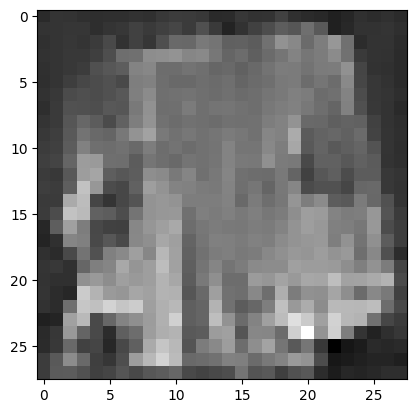

In [32]:
import matplotlib.pyplot as plt

image = samples[-1][0]
plt.imshow(
    image.reshape(image_size, image_size, channels), cmap="gray"
)


In [33]:
import numpy as np

image = np.clip(image, a_max=1, a_min=-1)

In [34]:
import numpy as np

from torchvision.transforms import Compose, ToTensor, Lambda, ToPILImage, CenterCrop, Resize


reverse_transform = Compose([
     Lambda(lambda t: (t + 1) / 2),
     # Lambda(lambda t: t.permute(1, 2, 0)), # CHW to HWC
     Lambda(lambda t: t * 255.),
     Lambda(lambda t: t.astype(np.uint8)),
])


In [35]:
image = reverse_transform(image)

In [36]:
image = np.transpose(image, (1, 2, 0))

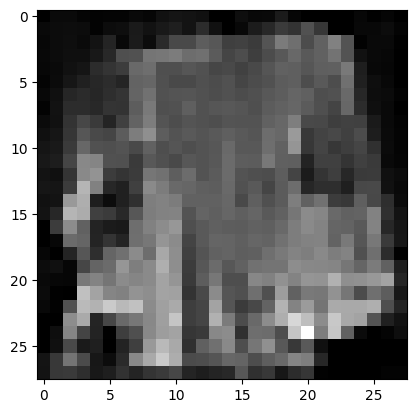

In [37]:
import matplotlib.pyplot as plt

random_index = 0
plt.imshow(
    image, cmap="gray"
)